# Daily Challenge: Interactive Data Visualization with Plotly and Plotnine

**Your Task:**

## 1. Data Preparation:
* Download and explore the [Global Superstore Orders](https://www.kaggle.com/datasets/shekpaul/global-superstore) dataset.
* Perform basic data cleaning and preprocessing.

## 2. Data Visualization with Plotly:
* Create an interactive line chart to show sales trends over the years.
* Build an interactive map to visualize sales distribution by country.

## 3. Data Visualization with Plotnine:
* Use Plotnine to generate a bar chart showing top 10 products by sales.
* Create a scatter plot to analyze the relationship between profit and discount.

## 4. Comparative Analysis:
* Compare the insights gained from Plotly and Plotnine visualizations.
* Document your observations about the ease of use and effectiveness of both tools.

## 5. Code and Insights:
* Write clear, well-documented Python code.
* Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

---

## About dataset:

* **Description**: The Global Superstore dataset contains sales data for a fictional global retail store, providing insights into sales, profits, and customer demographics.
* **Number of Records**: Approximately 50,000 rows of data.
* **Features**:
  * Order ID: Unique identifier for each order.
  * Product ID: Unique identifier for each product.
  * Customer ID: Unique identifier for each customer.
  * Order Date: The date the order was placed.
  * Ship Date: The date the order was shipped.
  * Country: The country where the order was placed.
  * City: The city where the order was delivered.
  * Category: The category of products sold (e.g., Furniture, Office Supplies, Technology).
  * Sales: Total sales amount for the order.
  * Quantity: Number of items ordered.
  * Discount: Discount applied to the order.
  * Profit: Profit made from the order.
* **Usage**: This dataset is commonly used for data analysis, visualization, and machine learning projects to understand sales trends and customer behavior in retail.

---

## 1. Data Preparation:

* Download and explore the Global Superstore Orders dataset.
* Perform basic data cleaning and preprocessing.


In [1]:
import pandas as pd
import xlrd # xls file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *

from sklearn.linear_model import LinearRegression

In [2]:
# Load the Orders sheet
df_orders = pd.read_excel('/content/Global Superstore.xls', sheet_name='Orders', engine='xlrd')

# Load the People sheet
df_people = pd.read_excel('/content/Global Superstore.xls', sheet_name='People', engine='xlrd')

# Load the Returns sheet
df_returns = pd.read_excel('/content/Global Superstore.xls', sheet_name='Returns', engine='xlrd')


We are interested in the `sales` dataset. We proceed to get an overview of the dataframe to work with

In [3]:
# Display basic dataframe info
print("### Dataset Preview")
display(df_orders.head())
print("\n### Dataset Information")
df_orders.info()
print("\n### Dataset Summary Statistics")
display(df_orders.describe(include='all'))

### Dataset Preview


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-nul

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,NaN,NaN,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,NaN,NaN,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,NaN,NaN,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,NaN
min,1.00000,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN
25%,12823.25000,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN
max,51290.00000,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.850000,8399.976000,933.570000,NaN


On first sight the data types seem to be right. If not the case we will work it on the run.

With a smaller dataset (and more time on hand) we could also make a quick statistical analysis comparing std against mean to give us an idea of variables variation.

For our tasks we will need data about: sales, profit, dates, country, product, discount. We could remove the other fields, but it`s preferible to keep them in case of potential insights.

The only field with missing variables is `Postal Code` (not necessary for our analysis), and we double check it below:


### Missing Values


,Missing Values,Percentage (%)
Row ID,0,0.00000
Order ID,0,0.00000
Order Date,0,0.00000
Ship Date,0,0.00000
Ship Mode,0,0.00000
Customer ID,0,0.00000
Customer Name,0,0.00000
Segment,0,0.00000
City,0,0.00000
State,0,0.00000


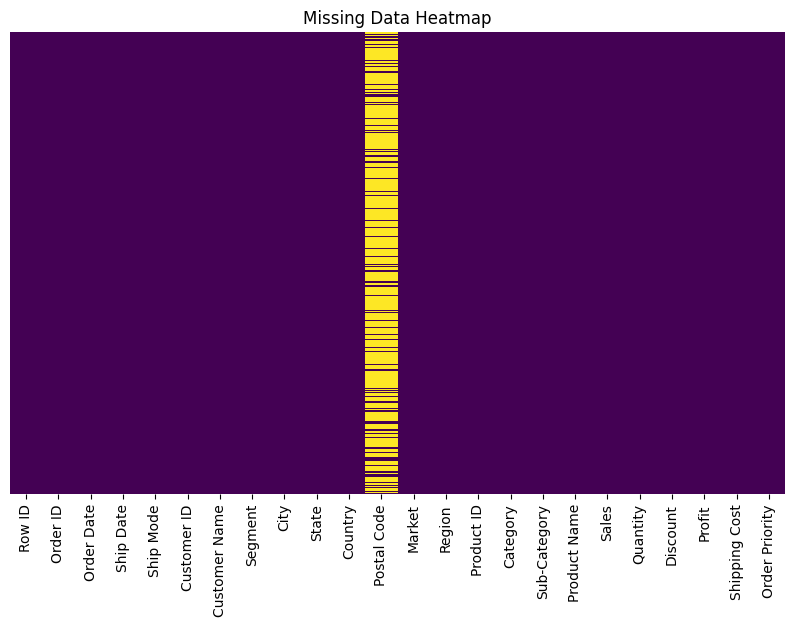

In [4]:
# missing values
print("\n### Missing Values")
missing_data = df_orders.isnull().sum()
missing_percentage = (missing_data / len(df_orders)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
display(missing_table)

# visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_orders.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

The next step is checking for duplicates:

In [5]:
# check Order duplicates
print(f'### Duplicates: {df_orders.duplicated().sum()}')

### Duplicates: 0


## 2. Data Visualization with Plotly:

* Create an interactive line chart to show sales trends over the years.
* Build an interactive map to visualize sales distribution by country.


In [6]:
# new year column
df_orders['Year'] = df_orders['Order Date'].dt.year

# group by year and calculate the total sales for each year
yearly_sales = df_orders.groupby('Year')['Sales'].sum().reset_index()

# ---------------- plot using plotly ---------------- #
p = px.line(yearly_sales,
              x='Year',
              y='Sales',
              # title='sales trends over the years', # not needed anymore after update_layout
              template='plotly_white') # more readable


# update title, can also axis titlesif wanted
p.update_layout(
    title={
        'text': "Sales Trends Over the Years",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center', # centered
    }
)


# more line width
p.update_traces(line=dict(width=4)) # personalize line


# xticks
p.update_xaxes(
    title_text='', # redundant due the plot title
    dtick=1) # tick spacing of one whole year


# yticks
p.update_yaxes(title_text='total sales (USD)')


# releases the kraken
p.show()

The line plot shows a clear growing tendency of global sales over the 4 years period. The trend seems to be polynomial, although only four points is a very small sample size.

In [7]:
# group sales by country
df_sales_by_country = df_orders.groupby('Country').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Shipping Cost': 'mean'
    }).sort_values(by='Sales', ascending=False).reset_index().copy() # nicer

# set names for cols
df_sales_by_country.columns = ['Country', 'Sales', 'Quantity', 'Profit', 'Average Shipping Cost']

# make it more readable by rounding large decimals
columns_to_round = ['Sales', 'Profit', 'Average Shipping Cost']
df_sales_by_country[columns_to_round] = df_sales_by_country[columns_to_round].round(2)


# ------------------- plot it with plotly ------------------- #
p = px.choropleth(df_sales_by_country,
                  locations='Country',
                  locationmode='country names',
                  color='Sales',
                  hover_name='Country',
                  hover_data=[
                      'Sales',
                      'Profit',
                      'Quantity',
                      'Average Shipping Cost'
                  ],
                  color_continuous_scale='turbo',
                  # title='Global Sales Distribution' # redundant
                  )

# update title
p.update_layout(
    title={
        'text': "Global Superstore Sales by Country",
        'y':0.985,
        'x':0.5,
        'xanchor': 'center', # centered
    },
    margin={"r":15,"t":30,"l":15,"b":15},
    height=600
)

p.show()

We observe on the world map how superstore sales are dispersed around the globe, except for some countries without sales or data, such as Greenland, Antarctica, and certain African countries.

The four countries with the most sales are the USA, followed by Australia, France, and China, in that order. The USA leads the board with more than twice the sales of the second place.

## 3. Data Visualization with Plotnine:

* Use Plotnine to generate a bar chart showing top 10 products by sales.
* Create a scatter plot to analyze the relationship between profit and discount.


In [8]:
# define a new df to work with in this section
df_products = (df_orders.groupby('Product ID')
               .agg(
                   Sales=('Sales', 'sum'),
                   Profit=('Profit', 'sum'),
                   Discount=('Discount', 'sum'),
                   Quantity=('Quantity', 'sum'),
                   Average_Shipping_Cost=('Shipping Cost', 'mean'),
                   Average_Profit=('Profit', 'mean'),
                   Average_Discount=('Discount', 'mean')
               )
               .sort_values(by='Sales', ascending=False)).reset_index().copy() # sorted is nicer, also we'll need to sort

# round cols for legibility
columns_to_round = ['Sales', 'Profit', 'Discount', 'Average_Shipping_Cost', 'Average_Profit', 'Average_Discount']
df_products[columns_to_round] = df_products[columns_to_round].round(2)

print("### Top 10 Products by Sales:")
top_10 = df_products.head(10)
display(top_10)

### Top 10 Products by Sales:


,Product ID,Sales,Profit,Discount,Quantity,Average_Shipping_Cost,Average_Profit,Average_Discount
0,TEC-CO-10004722,61599.82,25199.93,0.60,20,255.26,5039.99,0.12
1,TEC-PH-10004664,30041.55,5455.95,0.84,52,392.29,545.59,0.08
2,OFF-BI-10003527,27453.38,7753.04,2.40,31,319.79,775.30,0.24
3,TEC-MA-10002412,22638.48,-1811.08,0.50,6,24.29,-1811.08,0.50
4,TEC-PH-10004823,22262.10,8121.48,0.85,39,163.51,738.32,0.08
5,FUR-CH-10002024,21870.58,0.00,1.60,39,310.38,0.00,0.20
6,FUR-CH-10000027,21329.73,1363.23,1.19,50,242.02,113.60,0.10
7,OFF-AP-10004512,21147.08,10345.58,0.30,38,377.25,1477.94,0.04
8,FUR-TA-10001889,20730.76,-2684.17,3.22,48,221.86,-244.02,0.29
9,OFF-BI-10001359,19823.48,2233.51,3.30,37,154.83,203.05,0.30


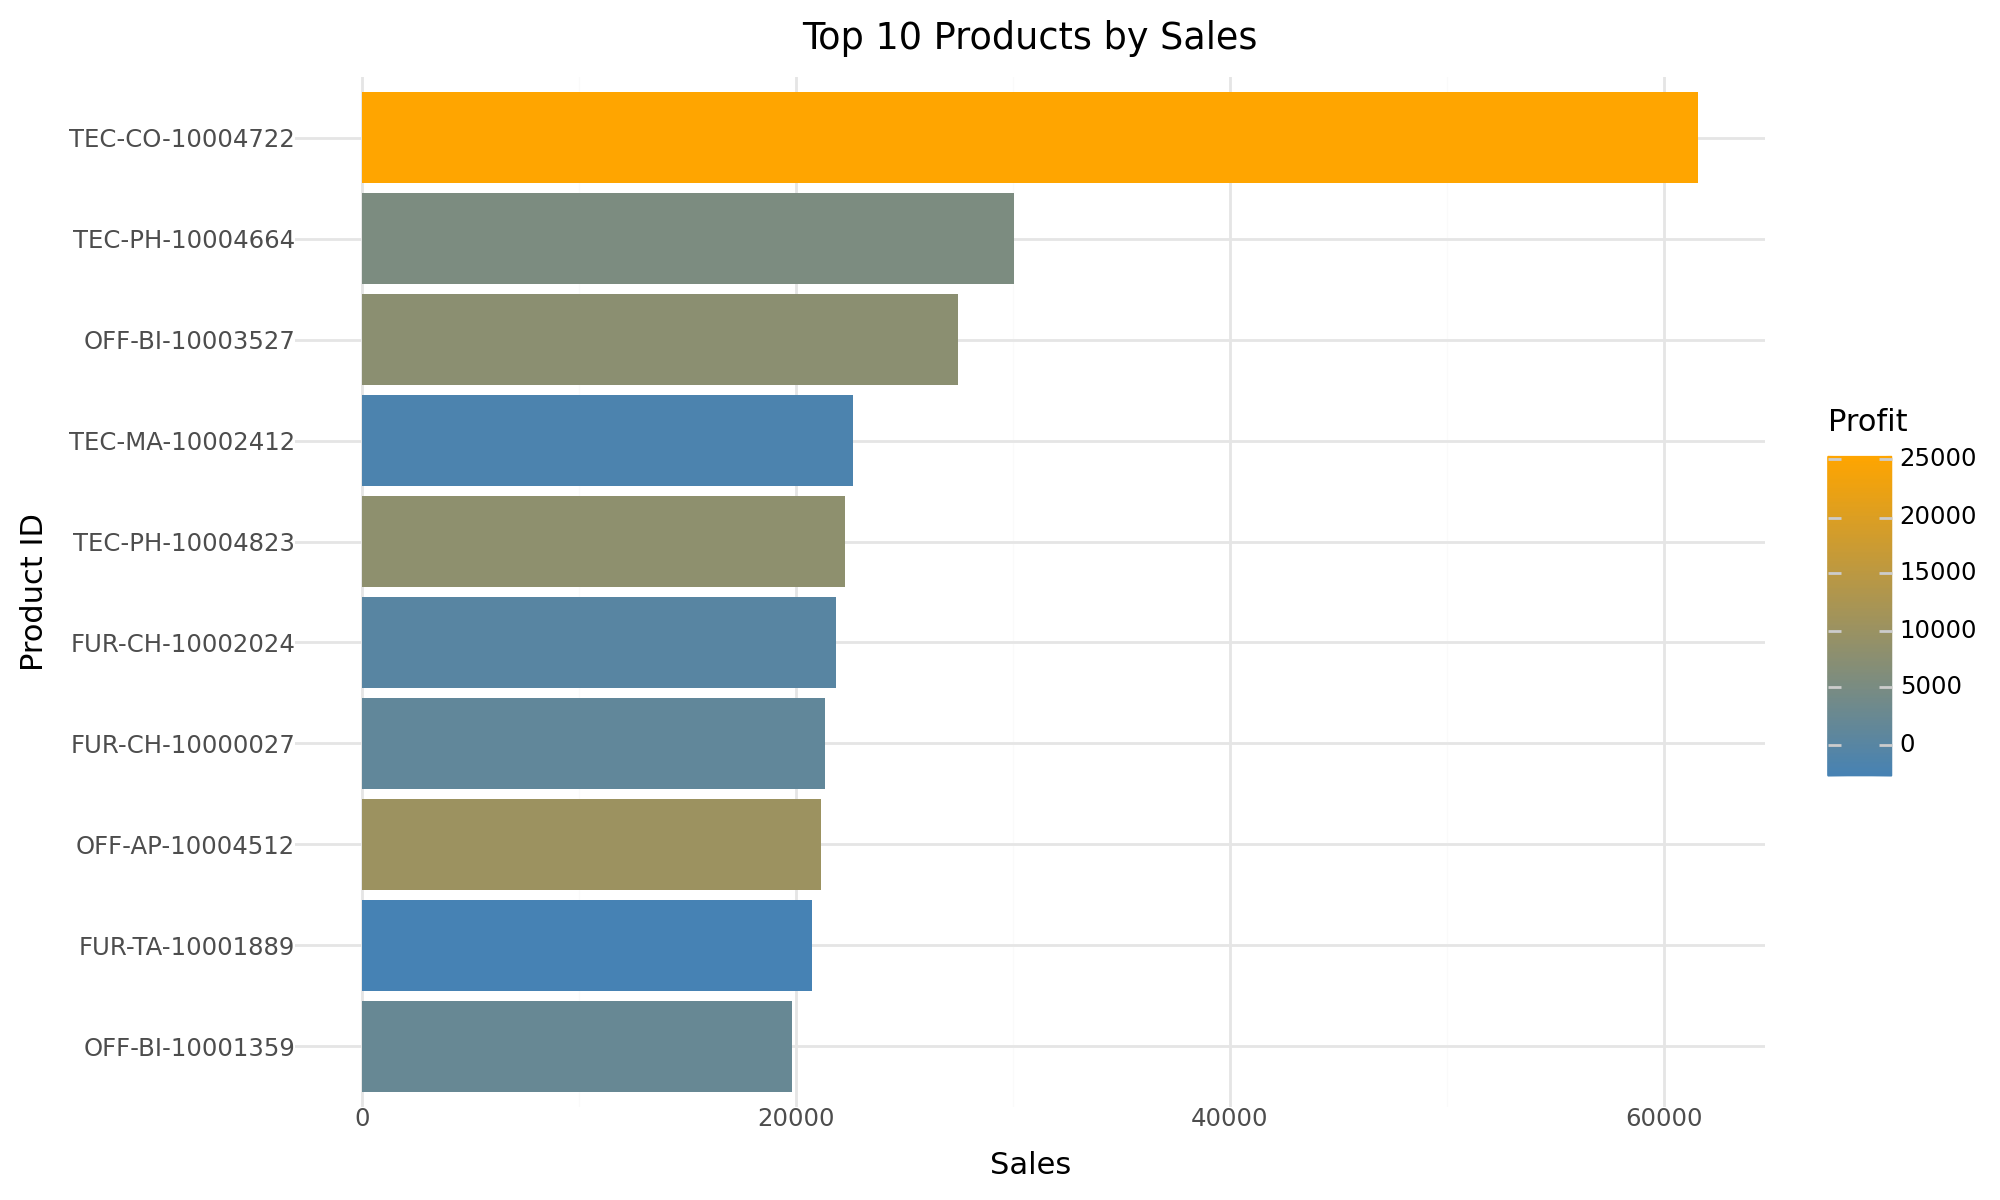

In [9]:
# invert order for the cols
top_10 = top_10.sort_values(by='Sales', ascending=True)

# plot it with plotnine
p = (
    ggplot(top_10, aes(x='Product ID', y='Sales', fill='Profit'))
    + geom_col( # cols plot
        stat='identity',
        # fill='steelblue'
        )
    + scale_fill_gradient(low='steelblue', high='orange')
    + labs(title='Top 10 Products by Sales', x='Product ID', y='Sales')
    + coord_flip()
    + theme_minimal()
    + theme(
        figure_size=(10, 6),
        # axis_text_x=element_text(rotation=45, hjust=1)
        )
    + scale_x_discrete(limits=top_10['Product ID'].tolist()) # to keep it sorted
)

p

We observe in the bar plot that TEC-CO-10004722 is the star product. The second and third-ranked products have approximately half its sales, while the remaining products each represent only about a third of TEC-CO-10004722's sales.

From the color scale on the same plot, we can see that TEC-CO-10004722 is also the most profitable product, confirming its status as a true star product for the global store.

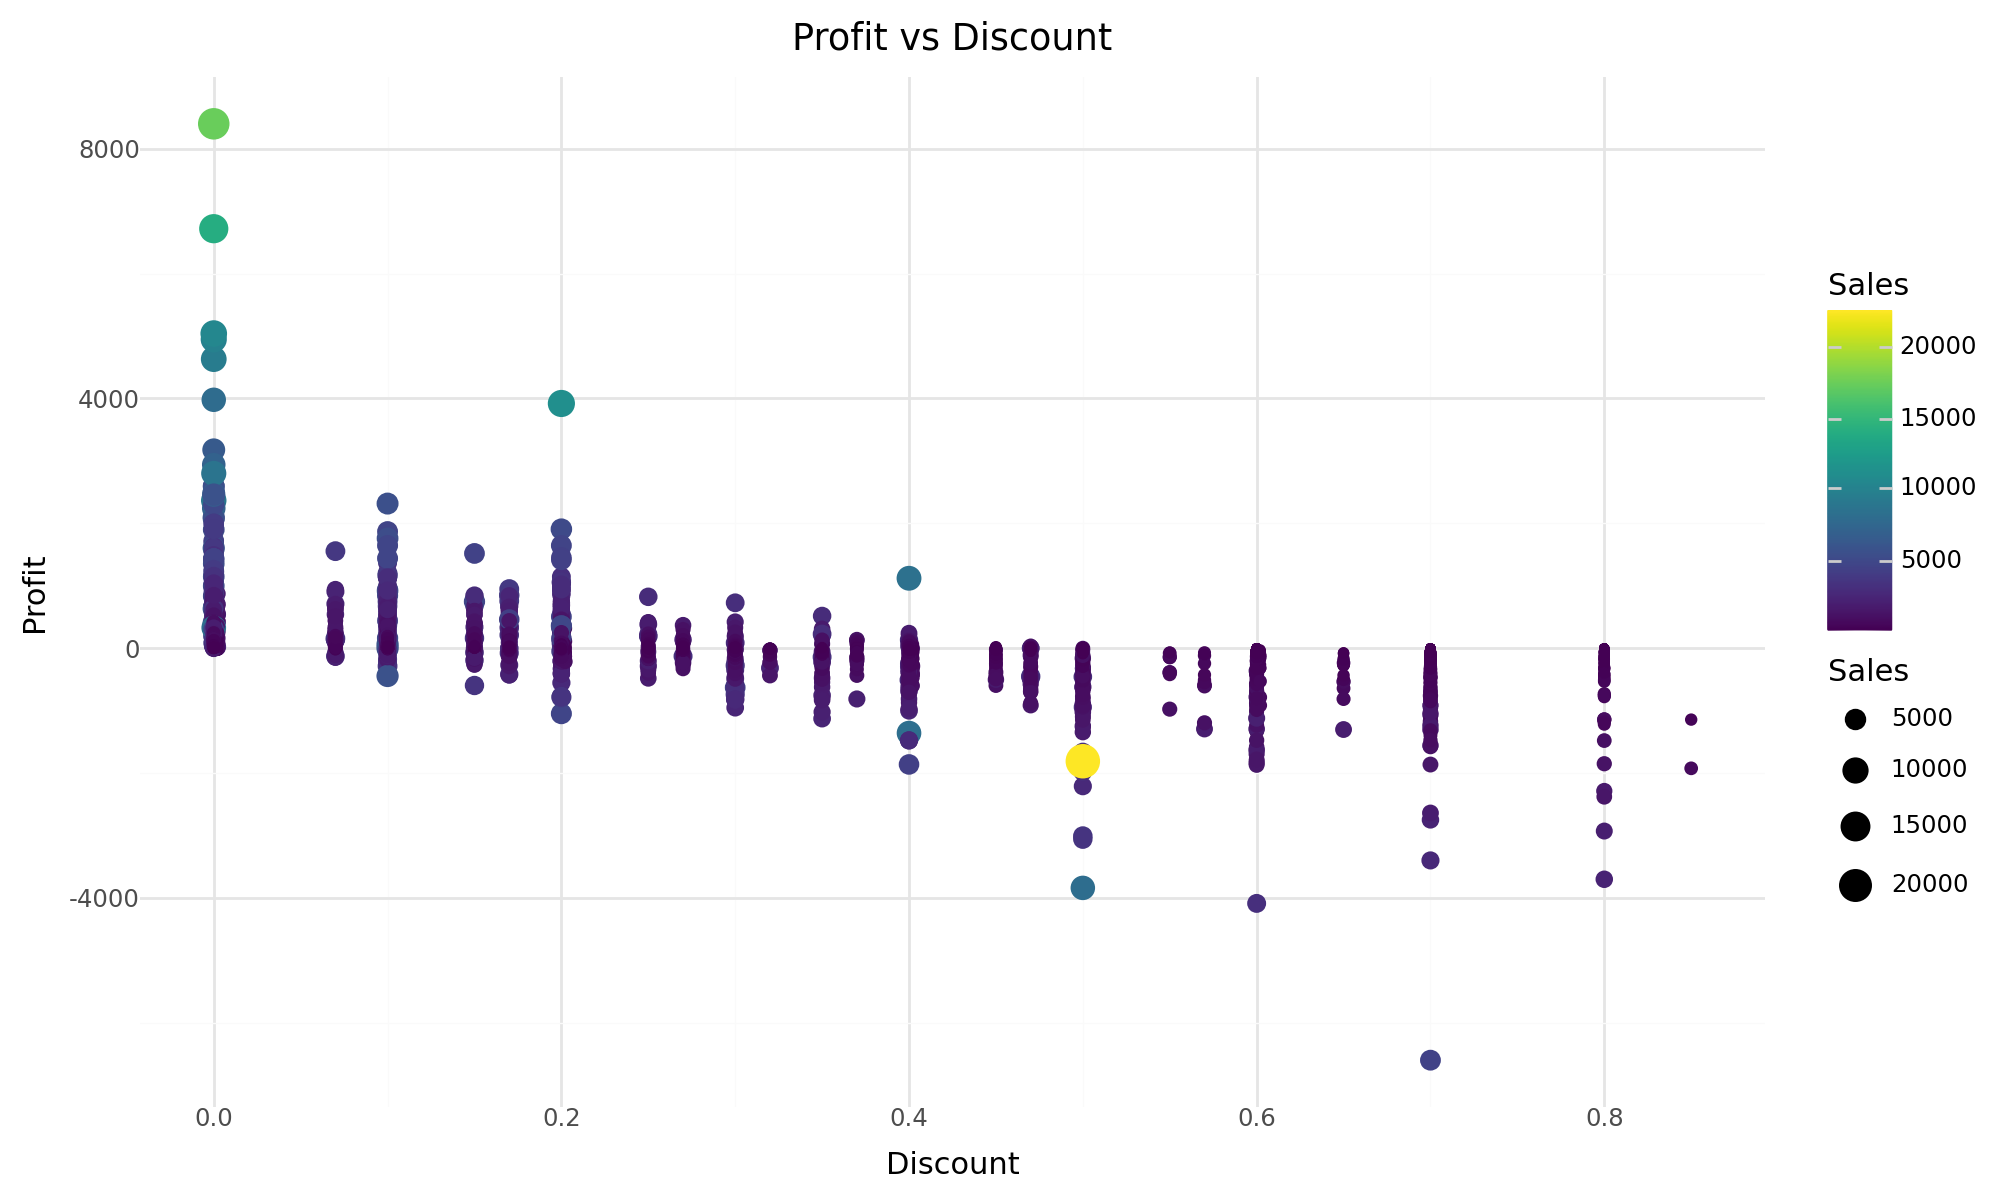

In [10]:
# ------------------------- plotnine scatter plot ------------------------- #
p = (
    ggplot(df_orders, aes(x='Discount', y='Profit', color='Sales', size='Sales'))
    + geom_point() # scatter plot
    # + geom_smooth(method='lm', se=True) # trend line
    + labs(title='Profit vs Discount', x='Discount', y='Profit')
    + theme_minimal()
    + theme(figure_size=(10, 6))
)

p

This scatter plot has many outliers and needs to be cleaned:

### Linear fit model
### Trend line equation is y = -154.31x + 33.03
### R-squared: 0.2693

### Log(x + 1) fit model
### Trend line equation is y = -193.53 * log(x + 1) + 33.84
### R-squared: 0.2651



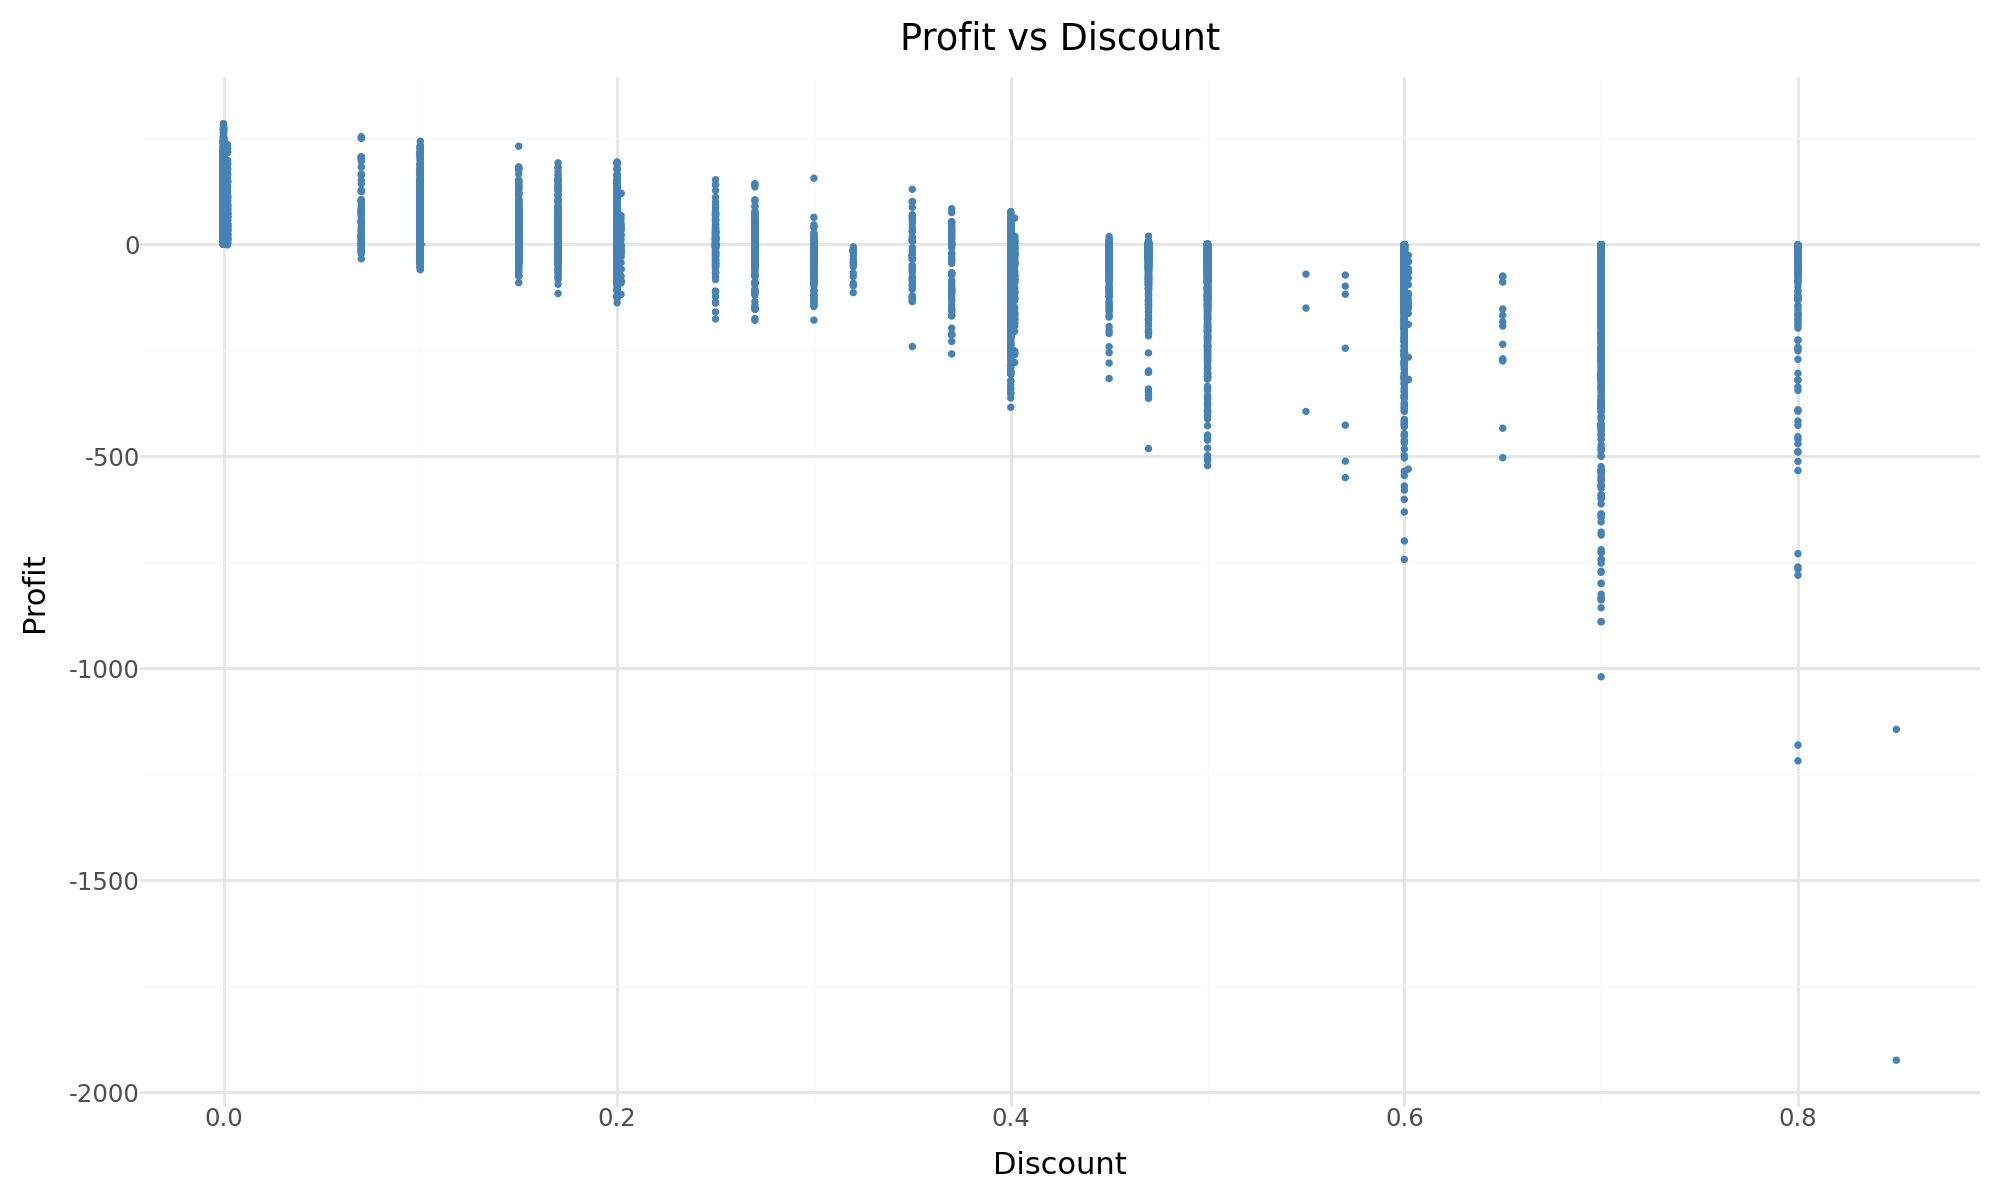

In [11]:
def outliers_removal(dataframe, column):
  """removes rows with outliers in a given column"""
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# df_orders_cleaned = outliers_removal(df_orders, 'Profit')
# df_orders_cleaned = outliers_removal(df_orders_cleaned, 'Discount')
df_orders_cleaned = outliers_removal(df_orders, 'Sales')


# ------------------------- linear fit model ------------------------- #
X = df_orders_cleaned['Discount'].values.reshape(-1, 1)
y = df_orders_cleaned['Profit'].values

# fit the model
model = LinearRegression()
model.fit(X, y)

# get coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print('### Linear fit model')
print(f"### Trend line equation is y = {slope:.2f}x + {intercept:.2f}")
print(f"### R-squared: {r_squared:.4f}\n")


# ------------------------- log(x + 1) fit model ------------------------- #
X = np.log1p(df_orders_cleaned['Discount']).values.reshape(-1, 1)  # log(x + 1)
y = df_orders_cleaned['Profit'].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print('### Log(x + 1) fit model')
print(f"### Trend line equation is y = {slope:.2f} * log(x + 1) + {intercept:.2f}")
print(f"### R-squared: {r_squared:.4f}\n")


# ------------------------- plotnine scatter plot ------------------------- #
p = (
    ggplot(df_orders_cleaned, aes(x='Discount', y='Profit'))
    + geom_point(color ='steelblue', size=0.5) # scatter plot
    # + geom_smooth(method='lm', se=True) # trend line
    + labs(title='Profit vs Discount', x='Discount', y='Profit')
    + theme_minimal()
    + theme(figure_size=(10, 6))
)

p

 To maintain a normally distributed price range, we removed the outliers in `Sales`. The scatter plot illustrates that as the discount increases, the profit tends to decrease (and vice versa). After a discount value of 0.4, there is almost no positive profit, and after a discount of 0.3, all profit is either zero or negative.

## 4. Comparative Analysis:

* Compare the insights gained from Plotly and Plotnine visualizations.
* Document your observations about the ease of use and effectiveness of both tools.


**Plotly**: The main feature from Plotly is its interactive visualizations. In a dev. context say for a webpage's *embedded dashboard*. It is another way to showcase DA without running on specific dashboard apps like Tableau or Power BI.

**Plotnine**: The main feature Plotnine possesses is a layered-based plot construction - inspired by the Grammar of Graphics. After a little practice, for some cases it can be more friendly and malleable than other powerful python tools like seaborn.

Both libraries possess a wide range of visualizations and are Pandas compatible (both cases not showcased in this notebook).

Both libraries are powerful tools for data visualization, each with its own strengths. Plotly excels in interactive, web-ready visualizations, while Plotnine offers a familiar grammar of graphics.
